<a href="https://colab.research.google.com/github/SDelRiObando/CS-4662-Spaceship-Titanic-Machine-Learning/blob/sanskar-part/Sanskar_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this data of the Spaceship Titanic kaggle problem.

Here is all the data you need:
"train.csv"

## Data loading

### Subtask:
Load the "train.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "train.csv" file into a pandas DataFrame and display the first few rows.



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

df = pd.read_csv('train.csv')
display(df.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
Explore the dataset's structure, missing values, target variable, and summary statistics.



In [2]:
# Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Target Variable Exploration
print("\nTarget Variable 'Transported' Distribution:\n", df['Transported'].value_counts())
print("\nTarget Variable Data Type:\n", df['Transported'].dtype)


# Basic Summary Statistics
print("\nSummary Statistics for Numerical Features:\n", df.describe())

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")

# Initial Observations
print("\nInitial Observations:")
print("The dataset has a mix of numerical and categorical features. Several columns have missing values, with 'Cabin' and 'HomePlanet' having the most. The 'Transported' target variable is boolean and seems to be balanced.  Further investigation is needed to understand the relationships between features and the target variable. The 'PassengerId', 'Cabin', and 'Name' columns might need further processing.  The summary statistics reveal the distributions of numerical features, and the unique value counts for categorical features provide insights into their composition. Some of the numerical features have values of 0.0 which might represent missing data.")

Data Shape: (8693, 14)

Data Types:
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Missing Values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Missing Value Percentage:
 PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142

## Data analysis

### Subtask:
Analyze the distribution of key features and their relationship with the target variable.


**Reasoning**:
Calculate the percentage of transported passengers for each category of categorical features and basic statistics for numerical features, then investigate potential correlations.



In [3]:
# Group by categorical features and calculate the percentage of transported passengers
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for feature in categorical_features:
    print(f"\nTransported Percentage by {feature}:")
    display(df.groupby(feature)['Transported'].mean())

# Calculate basic statistics for numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
print("\nBasic Statistics for Numerical Features:")
display(df[numerical_features].describe())

# Group by 'Transported' and calculate statistics for numerical features
print("\nStatistics for Numerical Features by Transported Status:")
display(df.groupby('Transported')[numerical_features].agg(['mean', 'median', 'std']))

# Correlation matrix for numerical features
print("\nCorrelation Matrix for Numerical Features:")
display(df[numerical_features].corr())

# Investigate potential correlations between categorical features and the target variable
# (Example: contingency table for 'HomePlanet' and 'Transported')
print("\nContingency table for HomePlanet and Transported:")
contingency_table = pd.crosstab(df['HomePlanet'], df['Transported'])
display(contingency_table)
print("\nContingency table for CryoSleep and Transported:")
contingency_table = pd.crosstab(df['CryoSleep'], df['Transported'])
display(contingency_table)
print("\nContingency table for Destination and Transported:")
contingency_table = pd.crosstab(df['Destination'], df['Transported'])
display(contingency_table)
print("\nContingency table for VIP and Transported:")
contingency_table = pd.crosstab(df['VIP'], df['Transported'])
display(contingency_table)


Transported Percentage by HomePlanet:


,Transported
HomePlanet,
Earth,0.423946
Europa,0.658846
Mars,0.523024



Transported Percentage by CryoSleep:


,Transported
CryoSleep,
False,0.328921
True,0.817583



Transported Percentage by Destination:


,Transported
Destination,
55 Cancri e,0.610000
PSO J318.5-22,0.503769
TRAPPIST-1e,0.471175



Transported Percentage by VIP:


,Transported
VIP,
False,0.506332
True,0.381910



Basic Statistics for Numerical Features:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000



Statistics for Numerical Features by Transported Status:


Age                   RoomService                     \
                  mean median        std        mean median         std   
Transported                                                               
False        29.922858   27.0  13.699262  389.266066    1.0  875.638123   
True         27.748834   26.0  15.151705   63.098021    0.0  274.812497   

              FoodCourt                     ShoppingMall                     \
                   mean median          std         mean median         std   
Transported                                                                   
False        382.615930    0.0  1200.115601   167.566217    0.0  456.528126   
True         532.691984    0.0  1931.306995   179.829972    0.0  722.026714   

                    Spa                          VRDeck                      
                   mean median          std        mean median          std  
Transported                                                                  
False        564.382666    4.0  1551.356047  543.629822    1.0  1563.088368  
True          61.675531    0.0   262.682871   69.148131    0.0   291.658171


Correlation Matrix for Numerical Features:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000



Contingency table for HomePlanet and Transported:


Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920



Contingency table for CryoSleep and Transported:


Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483



Contingency table for Destination and Transported:


Transported,False,True
Destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3128,2787



Contingency table for VIP and Transported:


Transported,False,True
VIP,,
False,4093,4198
True,123,76


## Data visualization

### Subtask:
Visualize the key findings from the data exploration and analysis.


**Reasoning**:
Visualize the data using histograms, bar plots, and box plots as requested in the subtask.  Also, create visualizations for the missing values.



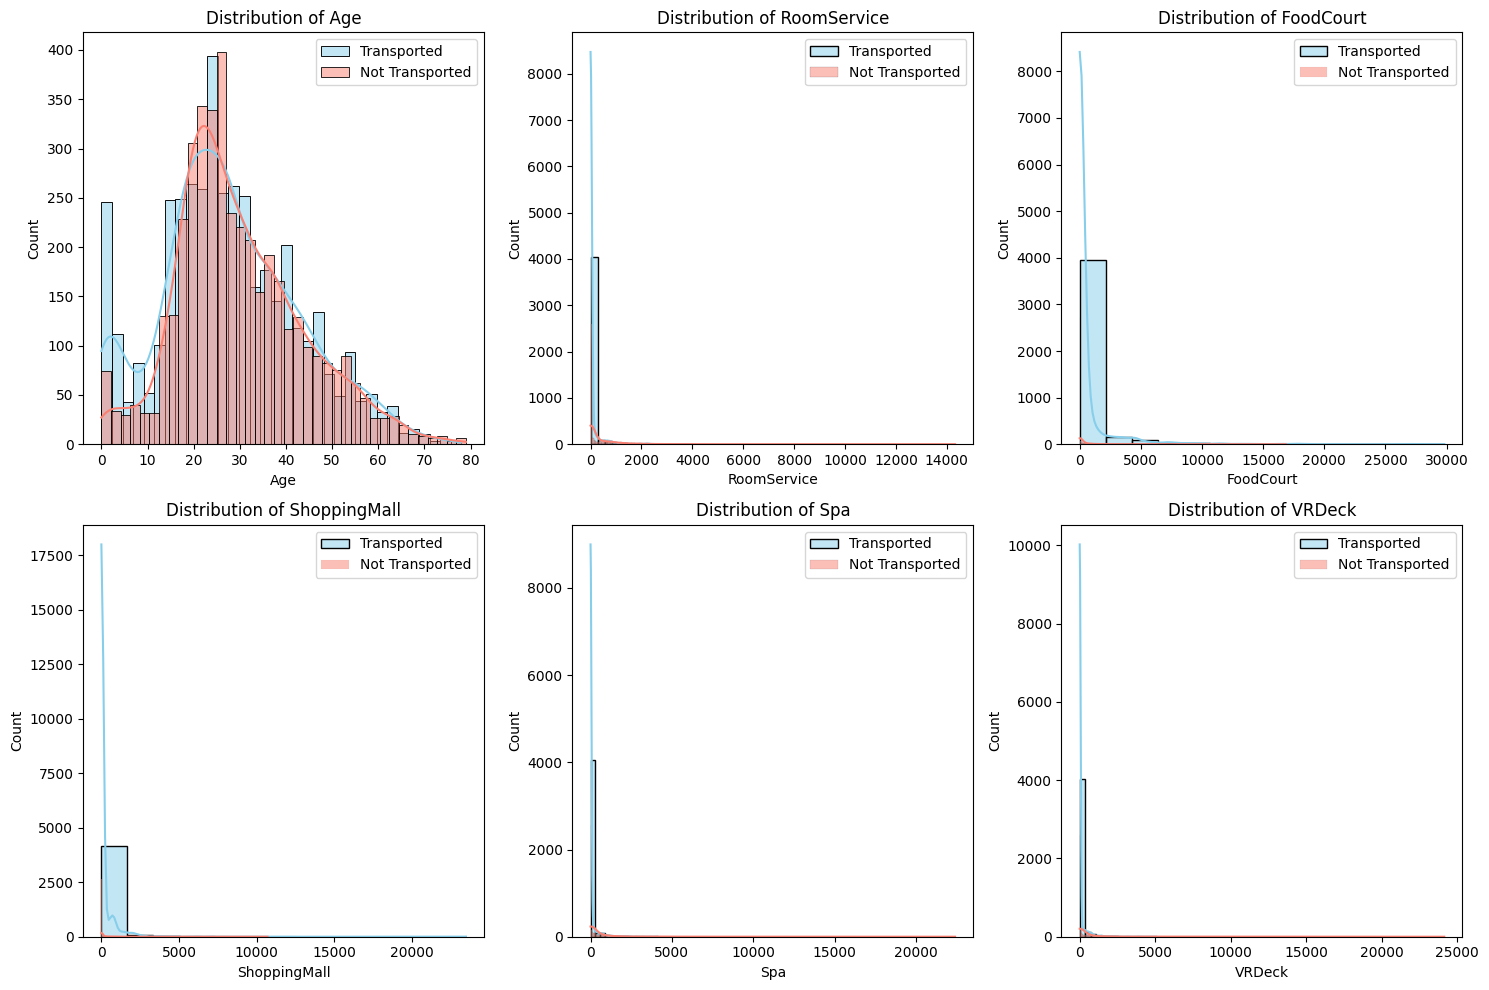

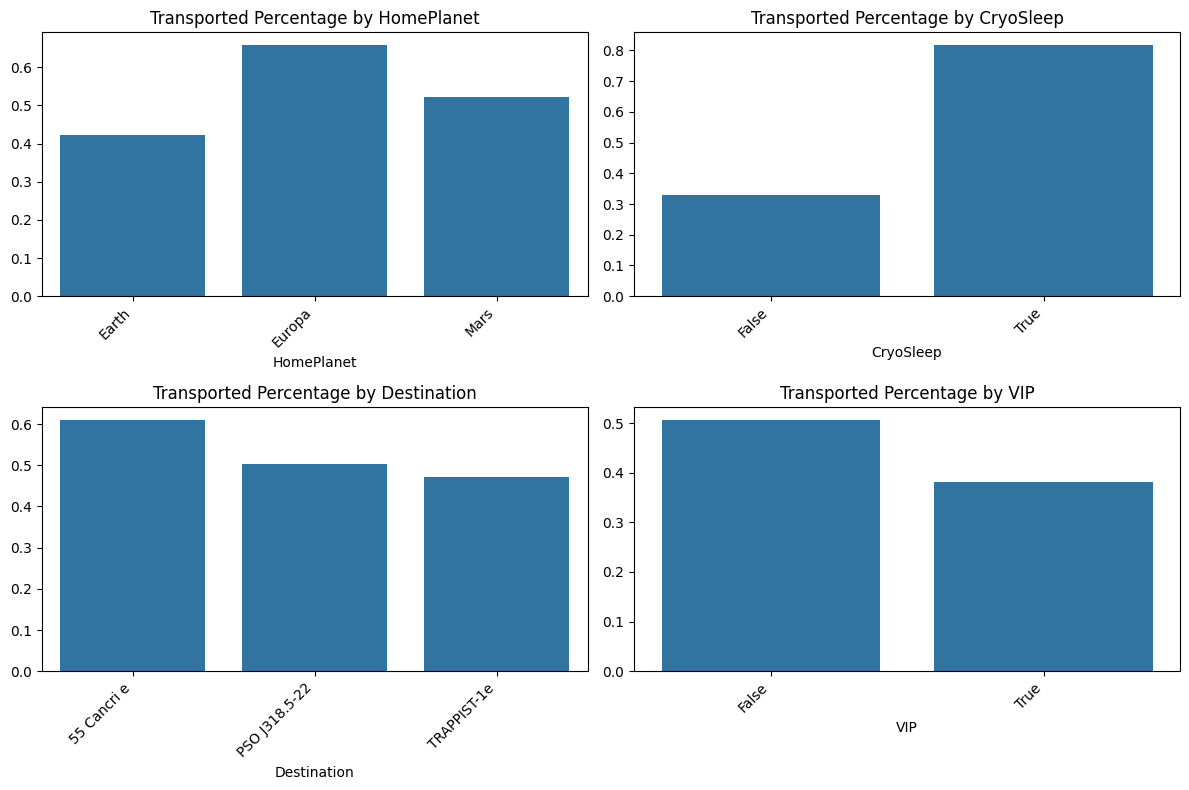

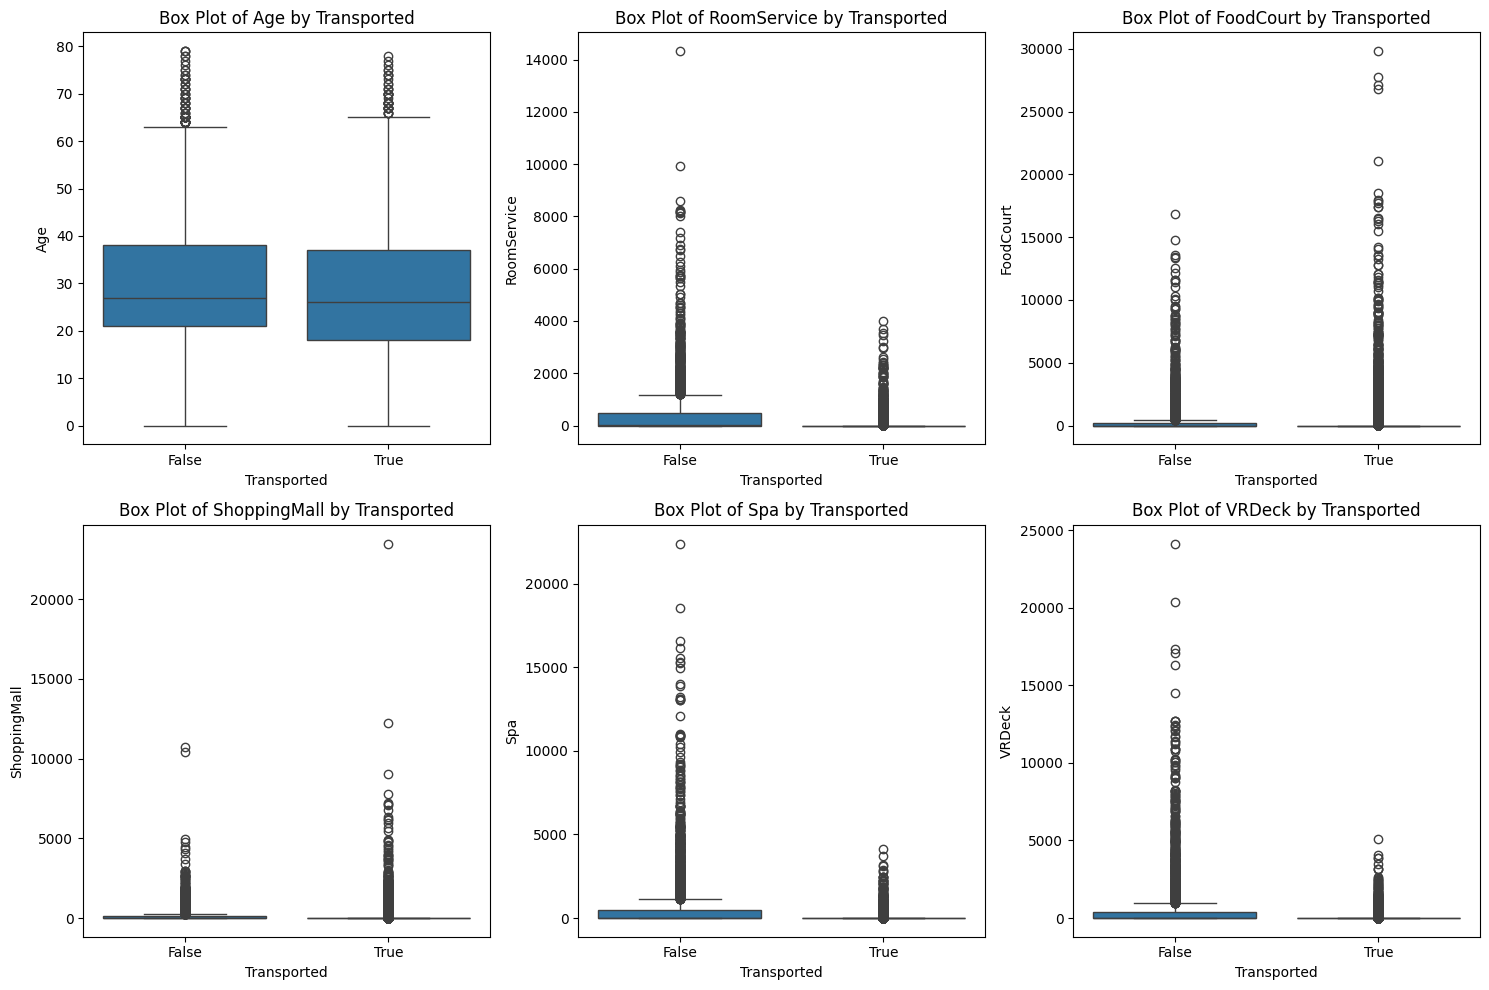

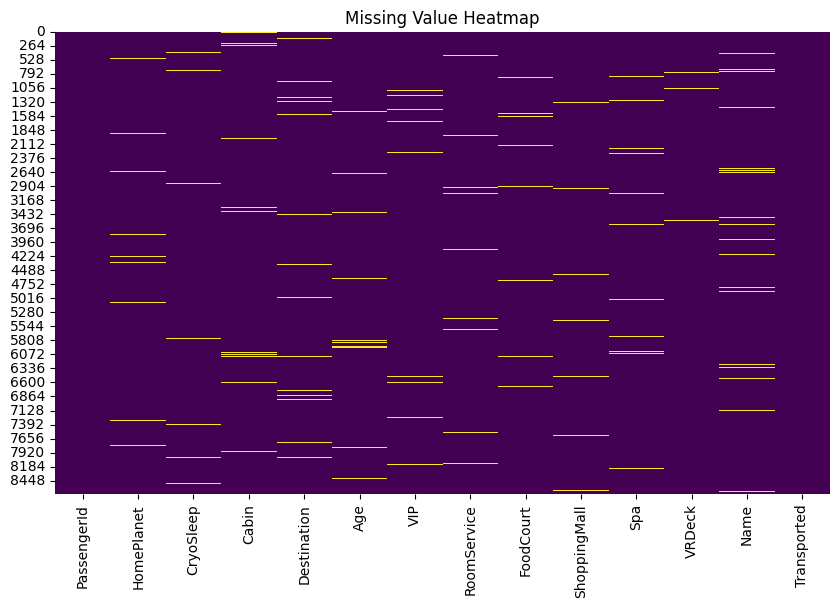

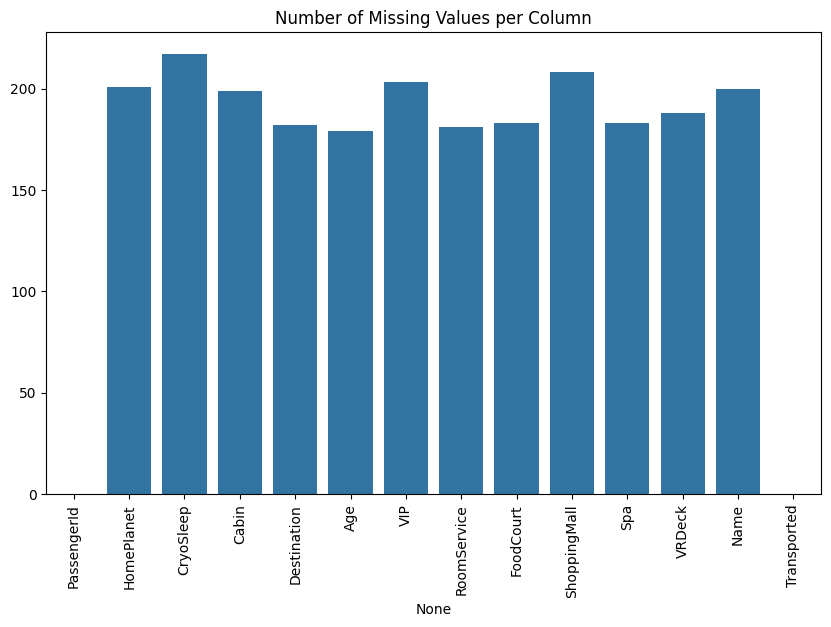

In [4]:


# Histograms for numerical features, grouped by 'Transported'
plt.figure(figsize=(15, 10))
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[df['Transported'] == True][feature], color='skyblue', label='Transported', kde=True)
    sns.histplot(df[df['Transported'] == False][feature], color='salmon', label='Not Transported', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()


# Bar plots for categorical features
plt.figure(figsize=(12, 8))
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    transported_percentage = df.groupby(feature)['Transported'].mean()
    sns.barplot(x=transported_percentage.index, y=transported_percentage.values)
    plt.title(f'Transported Percentage by {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Box plots for numerical features, grouped by 'Transported'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Transported', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Transported')
plt.tight_layout()
plt.show()


# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Bar plot of missing values per column
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Number of Missing Values per Column')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Drop irrelevant columns
columns_to_drop = ['PassengerId', 'Name']
df.drop(columns_to_drop, axis=1, inplace=True)

# Split the 'Cabin' column into 'Deck', 'CabinNumber', and 'Side'
df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')  # Extract the first letter (Deck)
df['CabinNumber'] = df['Cabin'].str.extract(r'(\d+)')  # Extract the digits (Cabin number)
df['Side'] = df['Cabin'].str.extract(r'([PS])')  # Extract the side ('P' for Port, 'S' for Starboard)

# Drop the original 'Cabin' column after the split
df.drop('Cabin', axis=1, inplace=True)

# Combine all the spending features into a single total spend feature
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[spend_cols] = df[spend_cols].fillna(0)  # Fill missing spending data with 0
df['TotalSpend'] = df[spend_cols].sum(axis=1)  # Create TotalSpend as the sum of all spending features

# Drop individual spend columns
# df.drop(spend_cols, axis=1, inplace=True)

In [41]:
# Fill missing values for each of the extracted features
df['Deck'] = df['Deck'].fillna('None')
df['CabinNumber'] = df['CabinNumber'].fillna('None')
df['Side'] = df['Side'].fillna('None')

# Fill missing boolean values (CryoSleep) with false if spenditure was 0
df['CryoSleep'] = df['CryoSleep'].fillna(df['TotalSpend'] == 0).astype(bool)

# Filter the DataFrame to get the rows where VIP is True
vip_df = df[df['VIP'] == True]

# Calculate the average spending of VIPs
avg_vip_spend = vip_df['TotalSpend'].mean()

# Use this average to set the spending threshold
# Fill missing VIP values based on whether TotalSpend exceeds the average VIP spend
df['VIP'] = df['VIP'].fillna(df['TotalSpend'] > avg_vip_spend)

# Fill missing numerical values for 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing categorical values for 'HomePlanet' and 'Destination' with the most common value (mode)
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

<ipython-input-41-1ff48e90d4af>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df['TotalSpend'] == 0).astype(bool)
<ipython-input-41-1ff48e90d4af>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(df['TotalSpend'] > avg_vip_spend)


In [42]:
# Check for any remaining missing values
print(df.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
CabinNumber     0
Side            0
TotalSpend      0
dtype: int64


In [43]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side,TotalSpend
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1091.0


In [44]:
# Encode HomePlanet
le_homeplanet = LabelEncoder()
df['HomePlanet'] = le_homeplanet.fit_transform(df['HomePlanet'].astype(str))

# Encode Destination
le_destination = LabelEncoder()
df['Destination'] = le_destination.fit_transform(df['Destination'].astype(str))

# Encode Deck
le_deck = LabelEncoder()
df['Deck'] = le_deck.fit_transform(df['Deck'].astype(str))

# Encode CabinNumber
le_cabinnumber = LabelEncoder()
df['CabinNumber'] = le_cabinnumber.fit_transform(df['CabinNumber'].astype(str))

# Encode Side
le_side = LabelEncoder()
df['Side'] = le_side.fit_transform(df['Side'].astype(str))

# Convert CryoSleep and VIP to int
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)

In [45]:
df.drop('TotalSpend', axis=1, inplace=True)
# Define features (X) and target (y)
X = df.drop('Transported', axis=1)  # All columns except 'Transported' are features
y = df['Transported']  # 'Transported' is the target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (6954, 13)
Testing set size: (1739, 13)


In [46]:

# Create and train the Adaboost model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)  # Adjust n_estimators and random_state as needed
# Train on a single feature using imputed data
adaboost.fit(X_train, y_train)

# Evaluate the model
# Predict and evaluate
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7527


In [47]:
# Make predictions on the test dataset (class labels: 0 or 1)
adaboost_preds = adaboost.predict(X_test)

# Get predicted probabilities for the positive class (malignant cancer)
adaboost_probs = adaboost.predict_proba(X_test)[:, 1]

print(f"ADABoost Predictions: {adaboost_preds}")
print(f"ADABoost Probabilities: {adaboost_probs}")

ADABoost Predictions: [False False  True ... False  True False]
ADABoost Probabilities: [0.42164783 0.4969286  0.58986579 ... 0.48012031 0.61683223 0.35529483]


In [48]:
# Print classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to a DataFrame for pretty display
df_report = pd.DataFrame(report).transpose()
df_report.style.background_gradient(cmap='Blues').format(precision=2)

,precision,recall,f1-score,support
False,0.73,0.79,0.76,861.00
True,0.77,0.72,0.75,878.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.75,0.75,1739.00
weighted avg,0.75,0.75,0.75,1739.00


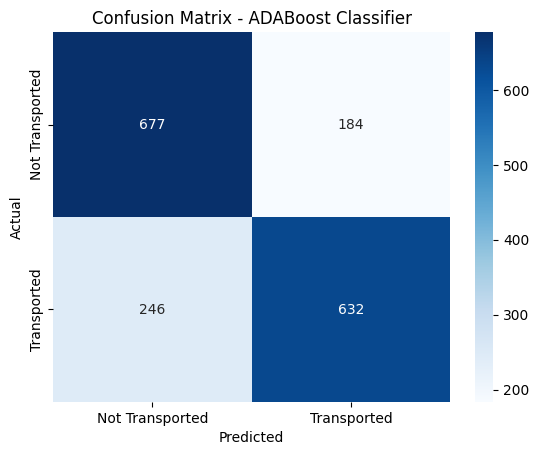

In [49]:
# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ADABoost Classifier')
plt.show()

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, adaboost_probs, pos_label=1)

In [51]:
# Calculate the accuracy of the xgb
adaboost_accuracy = accuracy_score(y_test, adaboost_preds)
# Calculate the Area Under The Curve
adaboost_auc = metrics.auc(fpr, tpr)

# Print accuracy and AUC score to evaluate XGBoost's performance
print("XGBoost Accuracy:", adaboost_accuracy)
print("XGBoost AUC:", adaboost_auc)

XGBoost Accuracy: 0.7527314548591144
XGBoost AUC: 0.852049981612735
